# [Back Friday Sales](https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda) data notebook
### Dataset history
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.

## Importing and fixing data

In [1]:
!pip install researchpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

> Product_Category_2 and Product_Category_3 have missing values, meaning product has no secondary or tertiary category respectfully

> Missing values will be handled in later sections of notebook

In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
categories = [col for col in df.columns if col not in ['User_ID', 'Product_ID', 'Purchase']]
categories

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

***Fixing datatypes for futher analysis***

In [9]:
df.loc[:, categories] = df.loc[:, categories].astype('category')

In [10]:
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category_1            category
Product_Category_2            category
Product_Category_3            category
Purchase                         int64
dtype: object

## EDA and basic visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline
plt.style.use('seaborn-dark')

***KDE Probability Density Plot***

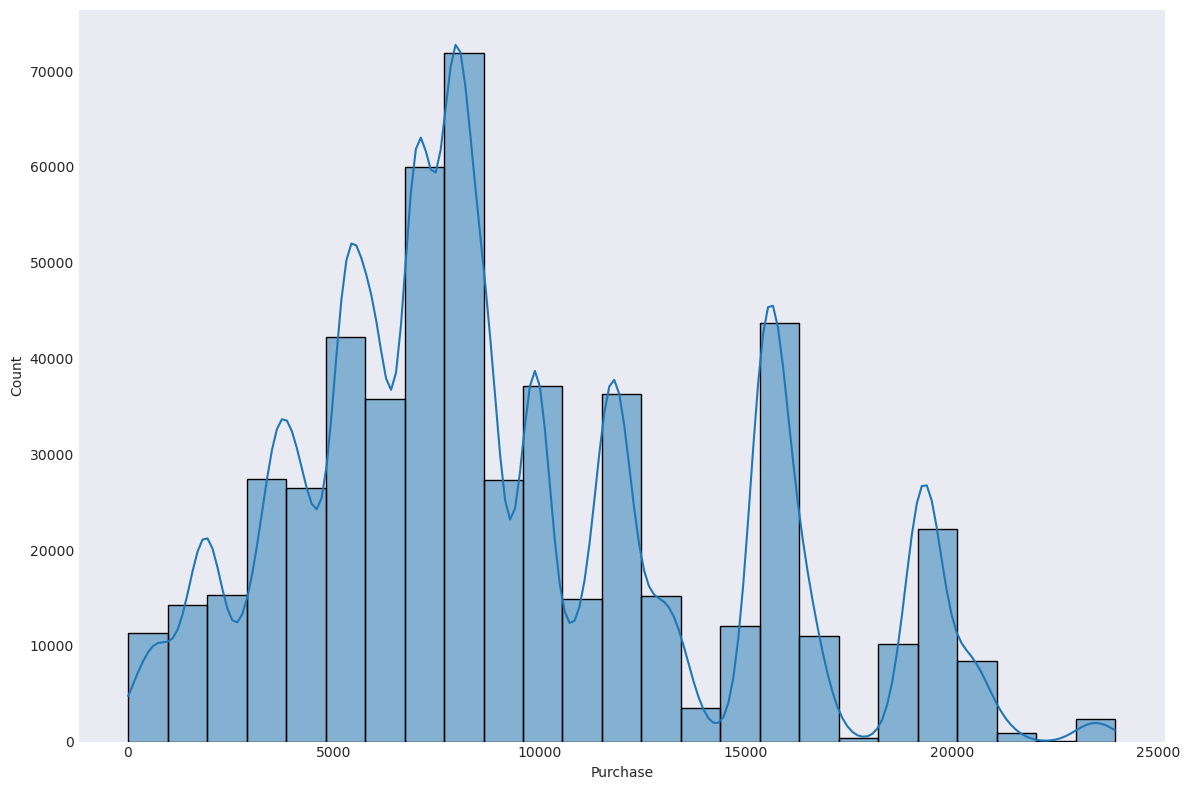

In [13]:
sns.displot(df['Purchase'], bins=25, kde=True, height=8, aspect=1.5)

> Purchase is the most dense between values 5000 and 10000

In [14]:
customer_features = [col for col in df.columns[1:-1] if not col.startswith('Product')]
customer_features

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status']

In [15]:
def create_barplot(data, x, y, estimator, orientation='v', ax=None):
    sns.barplot(data.sort_values(by=x), x=x, y=y, 
                estimator=estimator, orient=orientation, ax=ax).set_title(f'{estimator.__name__} of {y} vs {x}');

***Count of Purhcase for customer features***

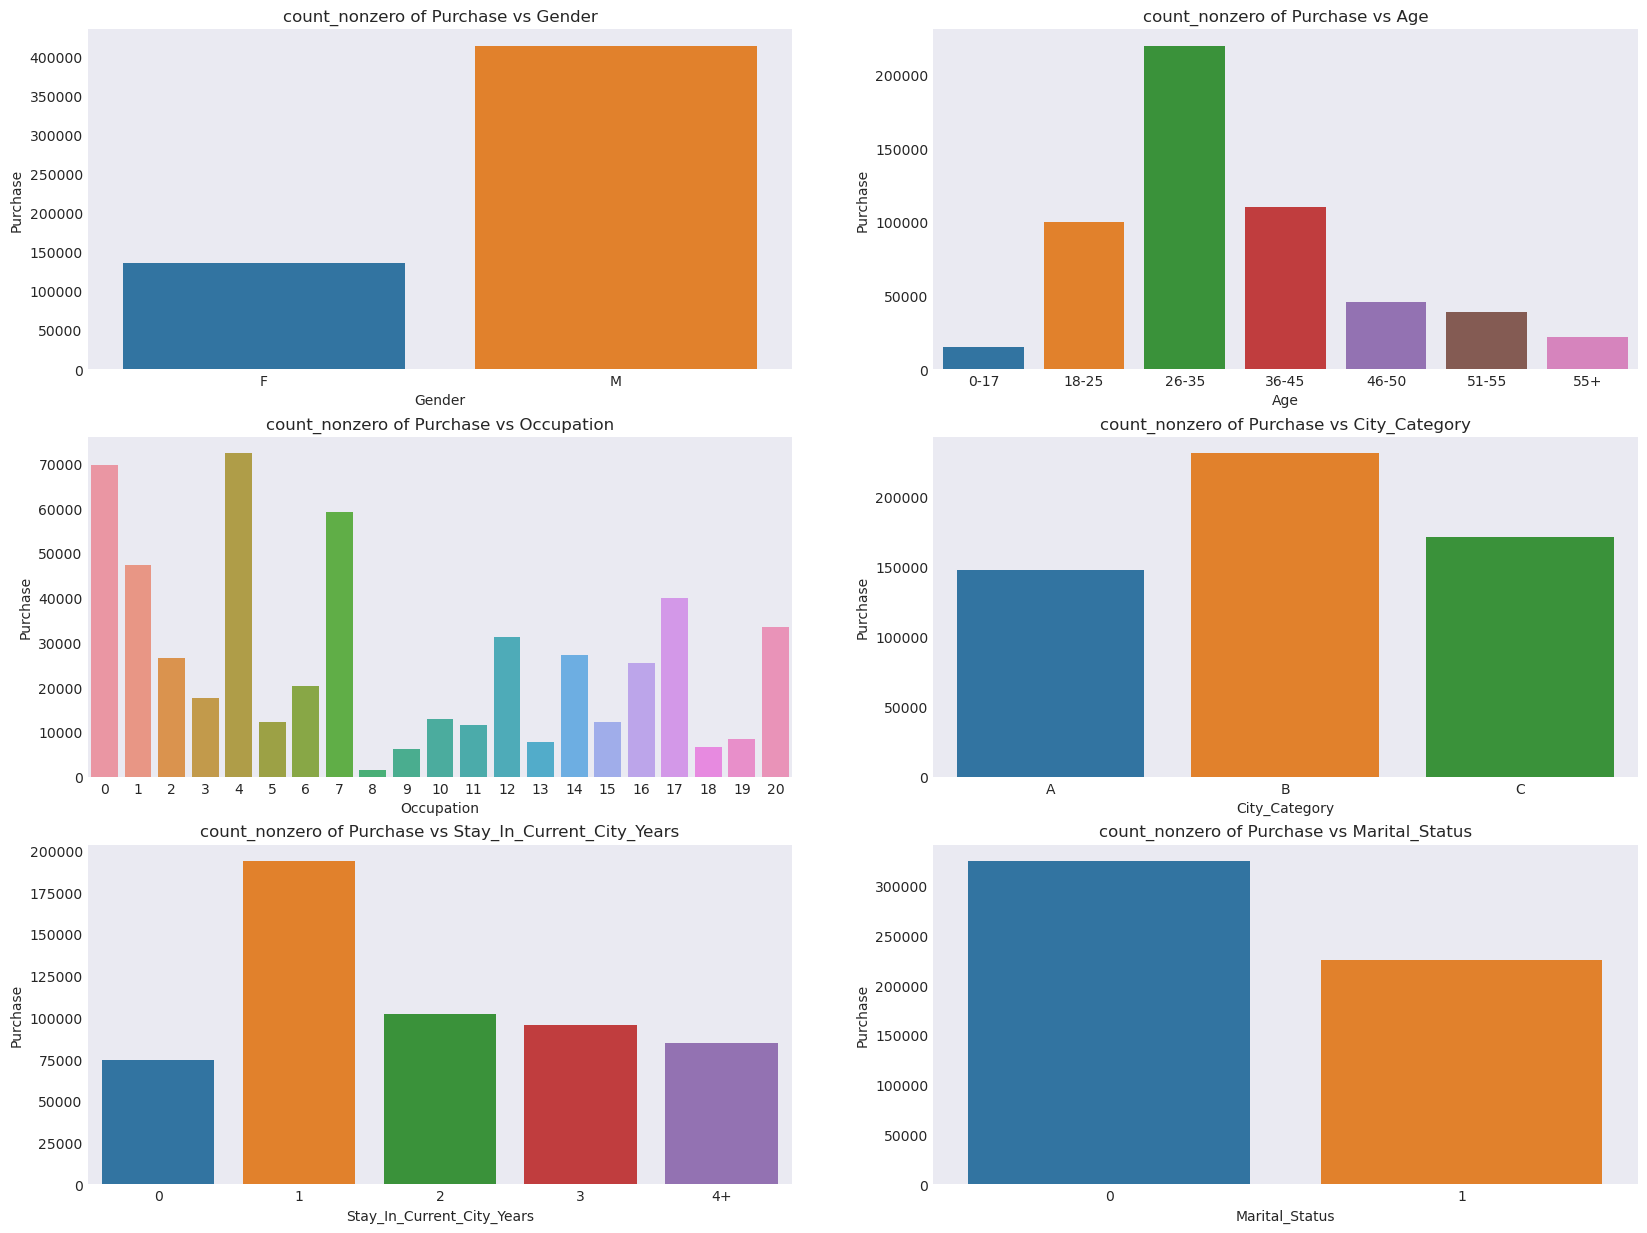

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15));
plt.subplots_adjust(hspace=0.2);
for col, ax in zip(customer_features, axes.ravel()):
    create_barplot(data=df, x=col, y='Purchase', estimator=np.count_nonzero, ax=ax)

> Groups across all customer features have different number of instances

***Mean value of Purchase for customer features***

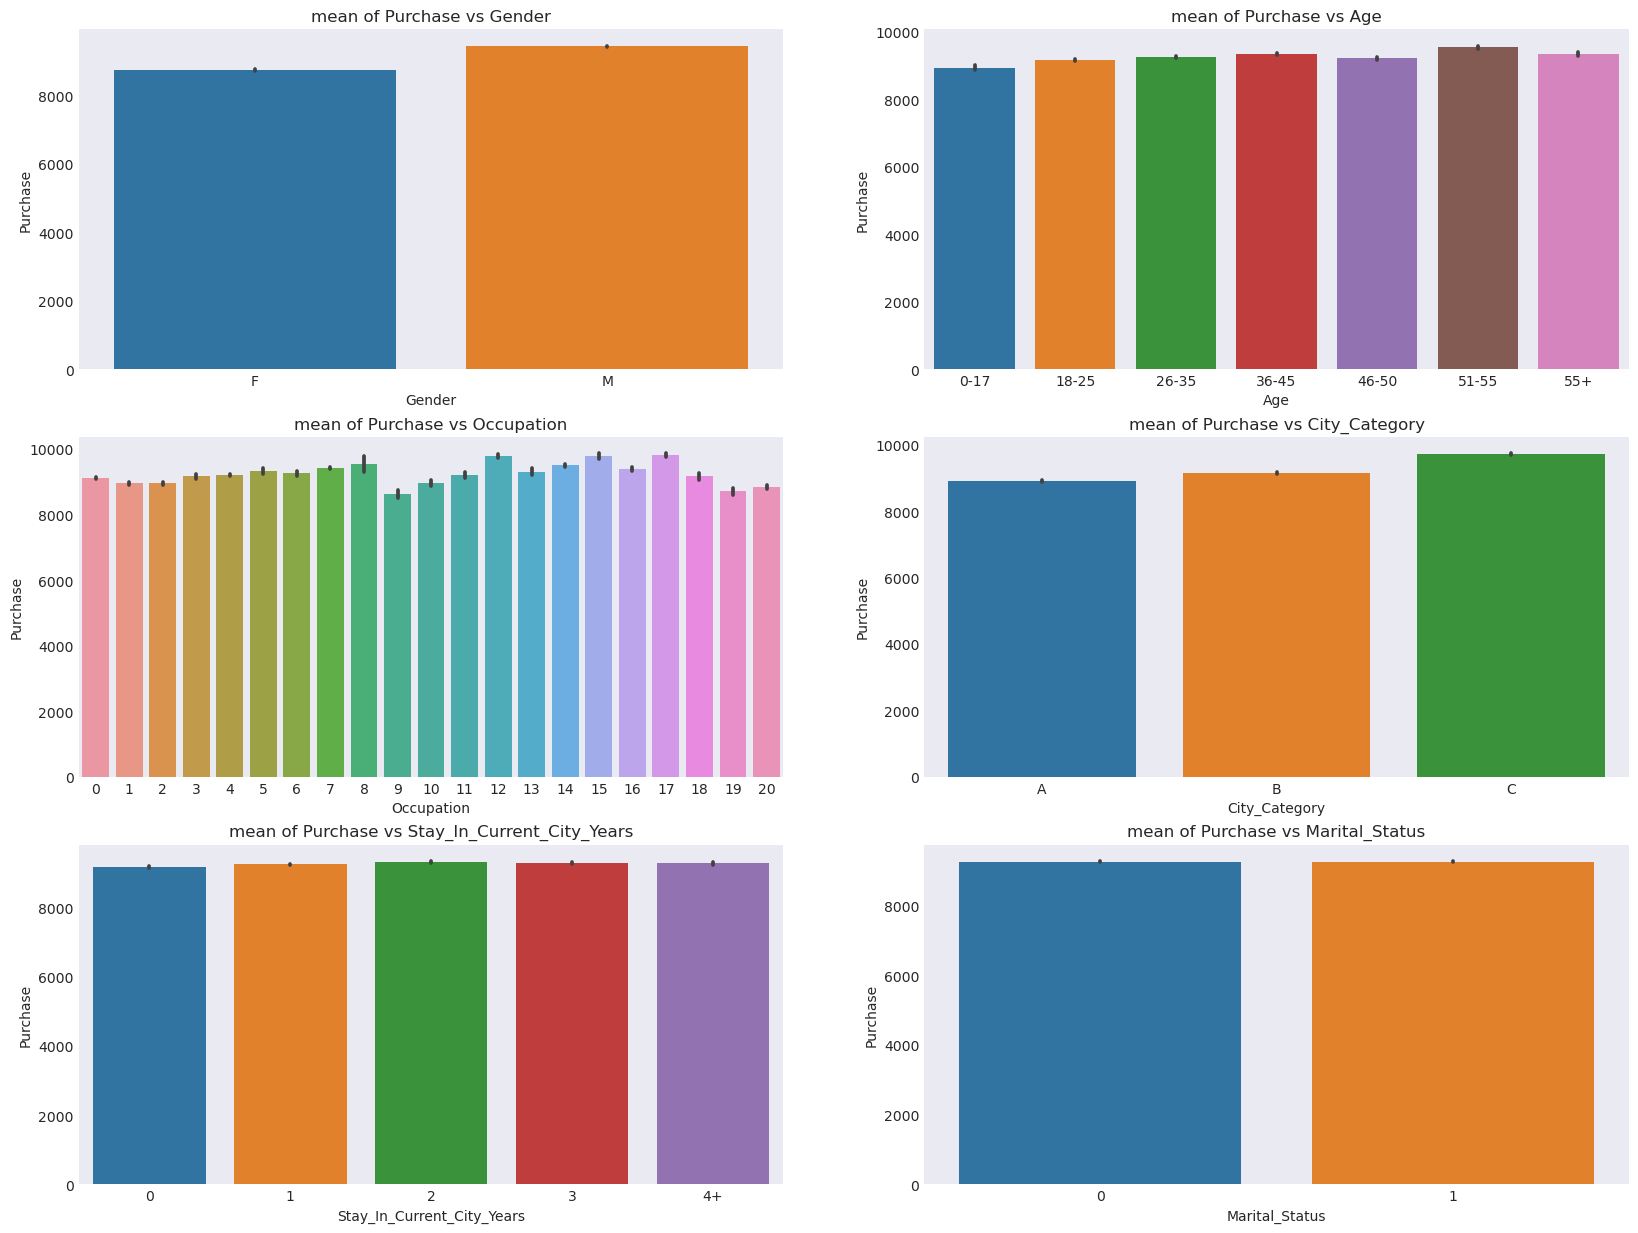

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15));
plt.subplots_adjust(hspace=0.2);
for col, ax in zip(customer_features, axes.ravel()):
    create_barplot(data=df, x=col, y='Purchase', estimator=np.mean, ax=ax)

> Mean of Purchase across almost all customer features are somehow different

> Mean of Purchase by Marital_Status and Stay_In_Current_City_Years looks even or almost even

***Creating pivot tables***

In [18]:
agg_dict ={'Purchase': ['sum', 'mean', 'median', 'std', 'count']}

In [19]:
def create_pivot(data, column, agg, print_=True):
    pivot = data.groupby(column).aggregate(agg).reset_index()
    if print_:
        print(pivot)
    return pivot

In [20]:
customer_features

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status']

In [21]:
pivot_list = []

In [22]:
for col in customer_features:
    pivot_list.append(create_pivot(df, col, agg_dict))

  Gender    Purchase                                          
                 sum         mean  median          std   count
0      F  1186232642  8734.565765  7914.0  4767.233289  135809
1      M  3909580100  9437.526040  8098.0  5092.186210  414259
     Age    Purchase                                          
                 sum         mean  median          std   count
0   0-17   134913183  8933.464640  7986.0  5111.114046   15102
1  18-25   913848675  9169.663606  8027.0  5034.321997   99660
2  26-35  2031770578  9252.690633  8030.0  5010.527303  219587
3  36-45  1026569884  9331.350695  8061.0  5022.923879  110013
4  46-50   420843403  9208.625697  8036.0  4967.216367   45701
5  51-55   367099644  9534.808031  8130.0  5087.368080   38501
6    55+   200767375  9336.280459  8105.5  5011.493996   21504
   Occupation   Purchase                                         
                     sum         mean  median          std  count
0           0  635406958  9124.428588  8001.0  49

In [23]:
pivot_gender, pivot_age, pivot_occupation, pivot_city_cat, pivot_stay_years, pivot_marital = pivot_list

***Example of accessing pivot table***

In [24]:
pivot_age.loc[:, [('Age', ''), ('Purchase', 'sum')]]

,Age,Purchase
,,sum
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


***Mean and count of Purchase for product categories***

In [25]:
product_features = [col for col in df.columns[2:] if col.startswith('Product')]
product_features

['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


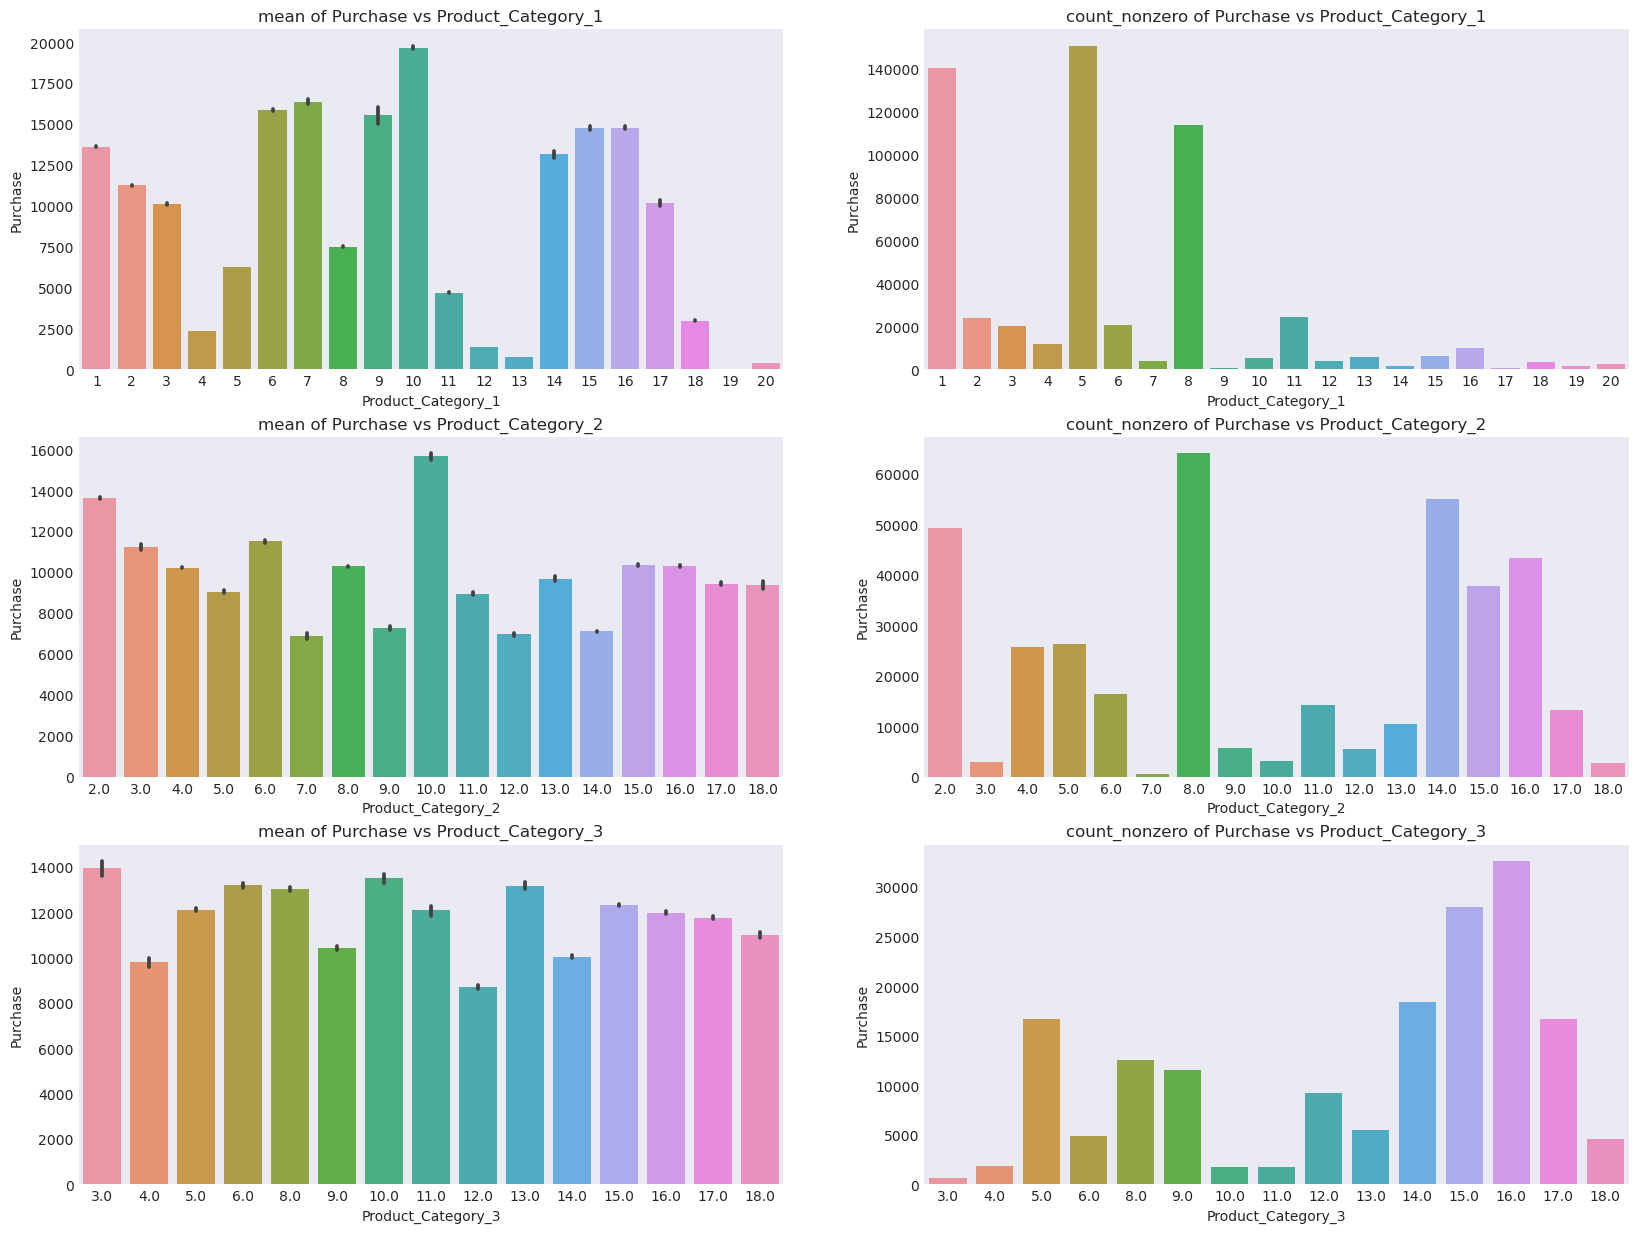

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15));
plt.subplots_adjust(hspace=0.2);
for col, ax in zip(product_features, axes.ravel()[::2]):
    create_barplot(data=df, x=col, y='Purchase', estimator=np.mean, ax=ax)
for col, ax in zip(product_features, axes.ravel()[1::2]):
    create_barplot(data=df, x=col, y='Purchase', estimator=np.count_nonzero, ax=ax)

In [27]:
pivot_list = []

In [28]:
for col in product_features:
    pivot_list.append(create_pivot(df, col, agg_dict))

   Product_Category_1    Purchase                                            
                              sum          mean   median          std   count
0                   1  1910013754  13606.218596  15245.0  4298.834894  140378
1                   2   268516186  11251.935384  12728.5  3570.642713   23864
2                   3   204084713  10096.705734  10742.0  2824.626957   20213
3                   4    27380488   2329.659491   2175.0   812.540292   11753
4                   5   941835229   6240.088178   6912.0  1909.091687  150933
5                   6   324150302  15838.478550  16312.0  4011.233690   20466
6                   7    60896731  16365.689600  16700.0  4174.554105    3721
7                   8   854318799   7498.958078   7905.0  2013.015062  113925
8                   9     6370324  15537.375610  14388.5  5330.847116     410
9                  10   100837301  19675.570927  19197.0  4225.721898    5125
10                 11   113791115   4685.268456   4611.0  1834.9

In [29]:
pivot_cat1, pivot_cat2, pivot_cat3 = pivot_list

In [30]:
pivot_cat2.loc[:, [('Product_Category_2', ''), ('Purchase', 'sum')]]

,Product_Category_2,Purchase
,,sum
0,2.0,670303864
1,3.0,32402777
2,4.0,262295485
3,5.0,236844899
4,6.0,189417477
5,7.0,4309812
6,8.0,658392656
7,9.0,41428000
8,10.0,47619084


In [31]:
# def create_kdeplot(data, x, hue, ax=None):
#     plt.figure(figsize=(15,8))
#     sns.kdeplot(data.sort_values(by=hue), x=x, hue=hue, common_norm=True, fill=True, ax=ax).set_title(f'KDE of {x} by {hue}');

### Some more visualizations

In [32]:
pie_data = pivot_city_cat.reset_index().droplevel(0, axis=1)
pie_data.columns.values[1] = 'City'
pie_data

,,City,sum,mean,median,std,count
0,0,A,1316471661,8911.939216,7931.0,4892.115238,147720
1,1,B,2115533605,9151.300563,8005.0,4955.496566,231173
2,2,C,1663807476,9719.920993,8585.0,5189.465121,171175


In [33]:
np.sum(pie_data['sum'])

5095812742

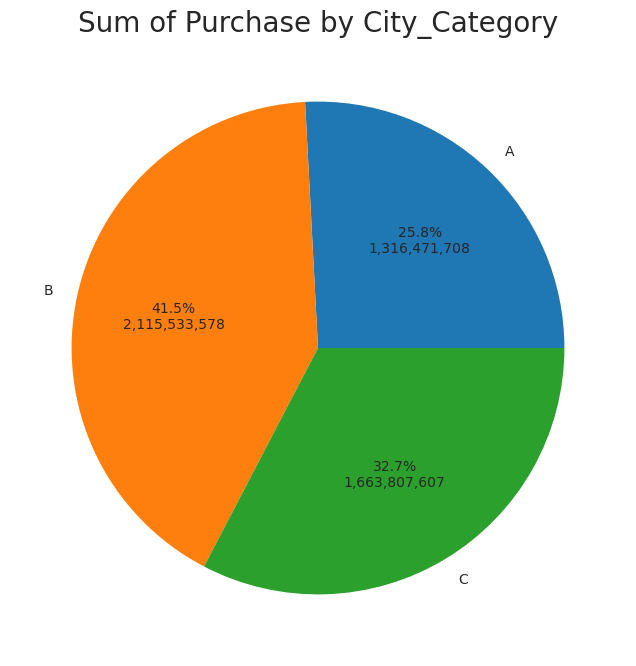

In [34]:
plt.figure(figsize=(8, 8))
plt.title('Sum of Purchase by City_Category', fontsize=20)
plt.pie(x=pie_data['sum'], labels=pie_data['City'], 
        autopct=lambda percent: f"{percent:.1f}%\n{int(np.round(np.sum(pie_data['sum'])*percent/100.)):,d}");

> Customers in the city B spent nearly 1.5 times as much then in the city A

In [35]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [36]:
temp = df.groupby(['Age', 'Gender'])['Purchase'].mean().unstack()
fig = px.bar(temp, barmode='stack', title='Mean of Purchase')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [37]:
temp = df.groupby(['Age', 'Gender', 'Marital_Status'])['Purchase'].mean().reset_index()\
    .sort_values(by=['Age',  'Purchase'], ascending=[1,1])
fig = px.bar(temp, x='Age', y='Purchase',color='Gender', facet_col='Marital_Status',
                                 barmode='group', title='Mean of Purchase')
# fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_yaxes(range=[7000, 10000])
fig.show()

> In most age groups (besides ages 46-50), unmarried male customers have slightly higher mean purchase then married

> Female customers dont have consistent trend

In [38]:
temp = df.groupby(['Occupation','Gender'])['Purchase'].mean()
temp = temp.reset_index()
fig = px.bar(temp, x='Occupation', y='Purchase',color='Gender',barmode='group'
                                  ,title='Mean of Purchase')
# fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_xaxes(tickmode='linear')

fig.show()

In [39]:
df.groupby('Gender')['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

> Tendency for higher avarage purchase made by male customers retains across almost every age group and every (besides 18) occupation group

In [40]:
temp = df.groupby(['Product_Category_1','Gender'])['Purchase'].mean()
temp = temp.reset_index()
fig = px.bar(temp, x='Product_Category_1', y='Purchase',color='Gender',barmode='group'
                                  ,title='Mean of Purchase')
# fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_xaxes(tickmode='linear')
fig.show()

> Gender groups of customers who purchased Product_Category_1 have mostly similar mean values of Purchase

> Female customers purchase noticeably more (on avarage) prodcuts 2, 3, 4, 9, 14

> Male customers have distinctly higher mean of purchase for products 6, 17, 18

### Grouping customers

In [41]:
df.shape

(550068, 12)

In [42]:
df['User_ID'].nunique()

5891

In [43]:
customer_features

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status']

In [44]:
df[df.groupby('User_ID')[customer_features].nunique() != 1].dropna(axis=0)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


> Every user represented in dataframe is indeed unique

In [45]:
unique_users = df[['User_ID'] + customer_features].drop_duplicates('User_ID')
unique_users

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...
185450,1004588,F,26-35,4,C,0,0
187076,1004871,M,18-25,12,C,2,0
221494,1004113,M,36-45,17,C,3,0
229480,1005391,M,26-35,7,A,0,0


In [46]:
grouped_user = df.groupby('User_ID')['Purchase'].agg(total_purchase='sum', mean_purchase='mean', 
                                                     median_purchase='median', max_purchase='max',
                                                    count_purchase = 'count').reset_index()
grouped_user.sort_values(by='total_purchase', ascending=False)

,User_ID,total_purchase,mean_purchase,median_purchase,max_purchase,count_purchase
4166,1004277,10536909,10762.930541,9738.0,23615,979
1634,1001680,8699596,8479.138402,7760.0,23631,1026
2831,1002909,7577756,10553.977716,9657.5,23446,718
1885,1001941,6817493,7591.863029,6831.5,21160,898
416,1000424,6573609,9472.059078,8034.5,23733,694
...,...,...,...,...,...,...
4866,1004991,52371,7481.571429,7775.0,12115,7
4989,1005117,49668,5518.666667,5879.0,8597,9
3782,1003883,49349,5483.222222,6946.0,8902,9
91,1000094,49288,7041.142857,5986.0,15482,7


***Taking a look at customers\` summaries distributions***

In [47]:
px.histogram(grouped_user, x='count_purchase', marginal='box').show()
px.histogram(grouped_user, x='mean_purchase', marginal='box').show()
px.histogram(grouped_user, x='total_purchase', marginal='box').show()

> Having customers that differs so greatly (highly skewed distribution) is normal for sales data

> Mean Purchase distribution is also looking reasonable enough

> Distribution of total Purchase amount by customer is positively skewed with extremely abnormal values at the end

In [48]:
def quartile_report(df, col):
    q1, q2, q3 = np.percentile(df[col], [25, 50, 75]) 
    iqr = q3-q1
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr
    outliers = df[((df[col] < lower_fence) | (df[col] > upper_fence))]
    
    print(f"""{col}
Number of observations: {len(df.index)}
{'Column mean':<22}: {df[col].mean():.1f}
{'Column median':<22}: {df[col].median()}

Quartile   Value
{'Q1':<10} {q1}
{'Q2':<10} {q2}
{'Q3':<10} {q3}

Lower fence: {lower_fence:,.1f}
Upper fence: {upper_fence:,.1f}
""")
    
    px.histogram(df, x=col, marginal='box').show()
    
    return outliers, q1, q2, q3

In [49]:
outliers, q1, q2, q3 = quartile_report(grouped_user, 'total_purchase')

total_purchase
Number of observations: 5891
Column mean           : 865016.6
Column median         : 521213.0

Quartile   Value
Q1         237678.0
Q2         521213.0
Q3         1119249.5

Lower fence: -1,084,679.2
Upper fence: 2,441,606.8



In [50]:
len(outliers.index)

409

In [51]:
len(outliers.index)/len(grouped_user.index)*100

6.942794092683754

> Almost 7% of observations can be considered as outliers (1.5 IQR above Q3)

***Taking a quick look at abnormal values at the end of right tail***

In [52]:
abnormal = outliers.nlargest(10, 'total_purchase').sort_values('total_purchase', ascending=False)
abnormal = abnormal.merge(unique_users, on='User_ID', how='inner')
abnormal.sort_values('total_purchase', ascending=False)

,User_ID,total_purchase,mean_purchase,median_purchase,max_purchase,count_purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1004277,10536909,10762.930541,9738.0,23615,979,M,36-45,16,A,0,0
1,1001680,8699596,8479.138402,7760.0,23631,1026,M,26-35,20,A,3,1
2,1002909,7577756,10553.977716,9657.5,23446,718,M,26-35,7,A,1,0
3,1001941,6817493,7591.863029,6831.5,21160,898,M,36-45,17,A,1,0
4,1000424,6573609,9472.059078,8034.5,23733,694,M,26-35,17,A,3,0
5,1004448,6566245,11419.556522,9930.0,23050,575,M,26-35,14,A,0,0
6,1005831,6512433,8957.954608,7936.0,23303,727,M,26-35,1,A,2,1
7,1001015,6511314,8799.072973,7877.0,23591,740,M,36-45,3,A,4+,1
8,1003391,6477160,9279.598854,8590.5,23883,698,M,18-25,4,A,0,0
9,1001181,6387961,7410.627610,6120.5,23579,862,M,36-45,7,A,3,1


In [53]:
print(abnormal['Age'].value_counts())
print(abnormal['Marital_Status'].value_counts())
print(abnormal['Gender'].value_counts())


26-35    5
36-45    4
18-25    1
0-17     0
46-50    0
51-55    0
55+      0
Name: Age, dtype: int64
0    6
1    4
Name: Marital_Status, dtype: int64
M    10
F     0
Name: Gender, dtype: int64


> All customers with extreme total spending are male

> All of them are from city A

> Almost all of them are in 26-45 age group

Let\`s say there is an interest in top 25% customers in terms of spending for targeting reasons.

For convenience, let\`s consider all recordings above the upper fence an outliers and query recordings between Q3 and upper fence as top 25% of customers.

In [54]:
iqr = q3-q1
upper_fence = q3 + 1.5*iqr

In [55]:
top_25 = grouped_user[(grouped_user['total_purchase'] > q3) & (grouped_user['total_purchase'] < upper_fence)]
top_25 = unique_users.merge(top_25, on='User_ID', how='inner')
top_25

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,total_purchase,mean_purchase,median_purchase,max_purchase,count_purchase
0,1000010,F,36-45,1,B,4+,1,2169510,9728.744395,8824.0,20957,223
1,1000017,M,51-55,1,C,0,0,1425995,12399.956522,12806.0,23768,115
2,1000018,F,18-25,3,B,3,0,1979047,10994.705556,11064.0,20235,180
3,1000019,M,0-17,10,A,3,0,1458069,10055.648276,8773.0,20220,145
4,1000022,M,18-25,15,A,4+,0,1279914,8204.576923,7066.5,19100,156
...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1006010,M,36-45,0,C,1,0,1934210,10927.740113,10071.0,21376,177
1060,1006011,M,36-45,15,C,3,0,1198714,11416.323810,10060.0,20572,105
1061,1006023,M,26-35,0,C,2,1,1222210,13888.750000,15286.0,20672,88
1062,1006037,F,46-50,1,C,4+,0,1119538,9176.540984,8063.5,23714,122


Some quick plotly charts for reference

In [56]:
fig = px.bar(top_25.sort_values(by='Age'), x='Age', color='Gender', title='top 25% customers in terms of total Purchase')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

In [57]:
px.bar(top_25, x='Gender', color='Marital_Status', title='top 25% customers in terms of total Purchase')

In [58]:
fig = px.bar(top_25, x='Occupation', color='Gender', title='top 25% customers in terms of total Purchase')
fig.update_xaxes(tickmode='linear')
fig.show()

In [59]:
temp = top_25.groupby('City_Category')['total_purchase'].sum().reset_index()
fig = px.pie(temp, values='total_purchase', names='City_Category', title='Top 25% customers` total Purchase by City_Category')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.update_layout(showlegend=False)
fig.show()

## Feature importance and thoughts on predicting Purhcase

During EDA, means of purchase across Marital_Status and Stay_In_Current_City_Years features seemed even. This can be checked by performing an ANOVA test

In [60]:
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [61]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [62]:
categories

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [63]:
response = 'Purchase'

In [64]:
def perform_anova(data, attr, response):
    model = smf.ols(attr + '.cat.codes ~ ' + response, data=data).fit()
    aov_table = sm.stats.anova_lm(model, type=2)
    #print(aov_table)
    return {attr: aov_table.loc[response, 'PR(>F)']}

In [65]:
aov_pval_dict = {}

***Performing ANOVA across all features***

In [66]:
for categ in categories:
    aov_pval_dict.update(perform_anova(df, categ, response)) 

In [67]:
aov_pval_dict

{'Gender': 0.0,
 'Age': 7.261069230431432e-32,
 'Occupation': 7.259684172672924e-54,
 'City_Category': 0.0,
 'Stay_In_Current_City_Years': 5.781617779710069e-05,
 'Marital_Status': 0.7310947526475329,
 'Product_Category_1': 0.0,
 'Product_Category_2': 1.983714361798852e-162,
 'Product_Category_3': 0.0}

In [68]:
def aov_interpret_print(pval_dict, level):
    pad = len(max(pval_dict, key=len))
    print('{0:<{pad}} P-value Null'.format('Feature', pad=pad))
    for atr, pval in pval_dict.items():
        null = 'Accepted' if pval >= level else 'Rejected'            
        print(f'{atr:{pad}} {pval:.5f} {null}')

In [69]:
level = 0.05
print(f'''One way ANOVA test
Null hypothesis: groups within features are statistically similar
Significance level: {level}
''')
aov_interpret_print(aov_pval_dict, level)

One way ANOVA test
Null hypothesis: groups within features are statistically similar
Significance level: 0.05

Feature                    P-value Null
Gender                     0.00000 Rejected
Age                        0.00000 Rejected
Occupation                 0.00000 Rejected
City_Category              0.00000 Rejected
Stay_In_Current_City_Years 0.00006 Rejected
Marital_Status             0.73109 Accepted
Product_Category_1         0.00000 Rejected
Product_Category_2         0.00000 Rejected
Product_Category_3         0.00000 Rejected


> Mean of purchase across Marital_Status is prooved to be statiscically similar, meaning this feature should be excluded before modeling

> Mean of purchase across Stay_In_Current_City_Years differs significantly

### Handling missing values

Given the nature of Product_Category_N feature, missing value means that the product belongs to only one or two categories respectfully, meaning there is no sense in filling those missing values, as well as dropping rows with missing categories or using only Product_Category_1.



**Suggestion**: create new column *Combined_Category*

In [70]:
df['Combined_Category'] = df.Product_Category_1.astype('str') +'_' +\
                          df.Product_Category_2.astype('Int64').astype('str').replace('<NA>', '') + '_' +\
                          df.Product_Category_3.astype('Int64').astype('str').replace('<NA>', '')
df['Combined_Category'] = df['Combined_Category'].apply(lambda x: x.rstrip('_'))
df.loc[:, 'Combined_Category'] = df.loc[:, 'Combined_Category'].astype('category')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Combined_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,3
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1_6_14
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,12
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,12_14
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,8


In [71]:
customer_features

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status']

In [72]:
categories = customer_features[:]
categories.append('Combined_Category')
categories

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Combined_Category']

### Feature selection

**Assumption**: Product category uniquely defines its price, meaning that importance of Combined_Category feature will always be higher than any other feature.

**Probation**: Using ```SelectKBest``` method from ```sklearn.feature_selection``` package to check features\` scores against *Purchase* using ```mutual_info_regression``` scoring function.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import OrdinalEncoder as oe

In [74]:
from itertools import compress

In [75]:
def feature_selection(X, y, score_f, k='all'):
    colnames = X.columns
    response = y.name
    X = oe().fit_transform(X)
    y = le().fit_transform(y)
    
    selector = SelectKBest(score_func=score_f, k=k)
    selector.fit_transform(X, y)
    
    mask = selector.get_support()
    supported_cols = list(compress(colnames, mask))
    
    pad = len(max(list(colnames), key=len))
    print(f'''Feature selection
Response: {response}
Score function: {score_f.__name__}
Total features: {len(colnames)}
Supported features, k: {k}
''')
    print('{f:<{pad}} Score'.format(f='Feature', pad=pad))
    for col, score in zip(supported_cols, selector.scores_):
        print(f'{col:{pad}} {score}')
      
    plot_dict = {
        'features': supported_cols,
        'scores': selector.scores_
    }
    sns.barplot(data=pd.DataFrame.from_dict(plot_dict), x='features', y='scores', color='b', errorbar=None)
    plt.xticks(rotation=75)

Feature selection
Response: Purchase
Score function: mutual_info_regression
Total features: 7
Supported features, k: all

Feature                    Score
Gender                     0.007513689242022004
Age                        0.00749321649045287
Occupation                 0.006780191867184815
City_Category              0.0042555580156102835
Stay_In_Current_City_Years 0.0007176715774543929
Marital_Status             0.0004880426209492583
Combined_Category          1.6887302858042101


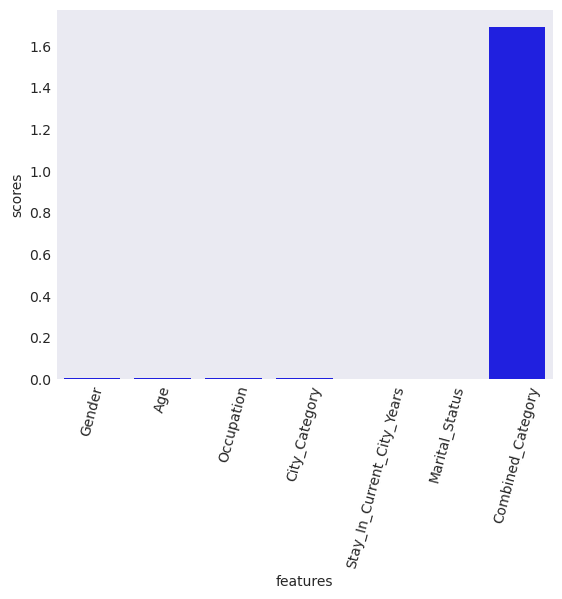

In [76]:
X = df[categories]
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
feature_selection(X_train, y_train, score_f=mutual_info_regression, k='all')

> As expected, mutual score of Combined_Category feature is absurdly higher

>Score of Marital_Status feature sugesting its redundancy once more

**Suggestion**: when addressing as a *regression* problem,  exclude product category from the model, otherwise Purchase will be predicted based on product category only.

Feature selection
Response: Purchase
Score function: mutual_info_regression
Total features: 6
Supported features, k: all

Feature                    Score
Gender                     0.00526158437127755
Age                        0.005118972920362896
Occupation                 0.006094298375817875
City_Category              0.006538496208376543
Stay_In_Current_City_Years 0.0
Marital_Status             0.0007575381002888903


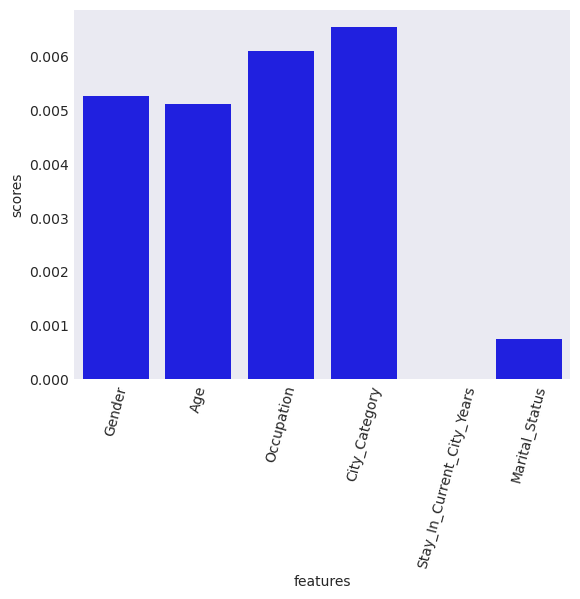

In [77]:
X = df[customer_features]
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
feature_selection(X_train, y_train, score_f=mutual_info_regression, k='all')

> Marital_Status and Stay_In_Current_City_Years once again suggested to be redundant.

Is exluding Product_Category feature from model a correct decision?

**Suggestion**: adress this as a *classification* problem, predicting Product_Category a customer with given features is likely to purchase.

### Importance of features against Combined_Category

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category_1          550068 non-null  category
 9   Product_Category_2          376430 non-null  category
 10  Product_Category_3          166821 non-null  category
 11  Purchase                    550068 non-null  int64   
 12  Combined_Category           550068 non-null  category
dtyp

***Performing chi squared test of independence between customer features and Cimbined_Category***

In [79]:
import researchpy as rp

In [80]:
from functools import partial

In [81]:
def num_in_range(start, end, num):
    return start < num <= end

Cramer\`s V interpretation from [Akoglu H. User's guide to correlation coefficients](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/), Table 2

In [82]:
cramers_v_interpretation = {
    partial(num_in_range, 0.25, 1.0): 'Very strong',
    partial(num_in_range, 0.15, 0.25): 'Strong',
    partial(num_in_range, 0.10, 0.15): 'Moderate',
    partial(num_in_range, 0.05, 0.10): 'Weak',
    partial(num_in_range, 0.0, 0.05): 'No or very weak'
}

In [83]:
response = 'Combined_Category'

In [84]:
def perform_chi2_independence_test(data, attr, response):
    crosstab, test_results, expected = rp.crosstab(data[attr], data[response],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    p_val = test_results.iloc[1, 1]
    cramers_v = test_results.iloc[2, 1]
    
    return {attr: [p_val, cramers_v]}
    

In [85]:
chi2_test_dict = {}

In [86]:
for categ in customer_features:
    chi2_test_dict.update(perform_chi2_independence_test(df, categ, response))

In [87]:
chi2_test_dict

{'Gender': [0.0, 0.1598],
 'Age': [0.0, 0.0732],
 'Occupation': [0.0, 0.0432],
 'City_Category': [0.0, 0.0657],
 'Stay_In_Current_City_Years': [0.0, 0.0241],
 'Marital_Status': [0.0, 0.0516]}

In [88]:
def chi2_interpret_print(chi2_dict, interpret_dict):
    pad = len(max(chi2_dict, key=len))
    print('{0:<{pad}} P-value {1:<11} Dependence'.format('Feature', "Cramer`s V", pad=pad))
    for atr, vals in chi2_dict.items():
        pval = vals[0]
        cramers_v = vals[1]
        for k, v in interpret_dict.items():
            if k(cramers_v):
                interpret = v
        print(f'{atr:{pad}} {pval:.5f} {cramers_v:<11.5f} {interpret}')
    

In [89]:
print(f'''Chi squared test of independence
Null hypothesis: Feature and Combined_Category are independent
''')
chi2_interpret_print(chi2_test_dict, cramers_v_interpretation)

Chi squared test of independence
Null hypothesis: Feature and Combined_Category are independent

Feature                    P-value Cramer`s V  Dependence
Gender                     0.00000 0.15980     Strong
Age                        0.00000 0.07320     Weak
Occupation                 0.00000 0.04320     No or very weak
City_Category              0.00000 0.06570     Weak
Stay_In_Current_City_Years 0.00000 0.02410     No or very weak
Marital_Status             0.00000 0.05160     Weak


>Chi squared test suggests there is strong dependence between Gender and Combined_Category

>It also suggests there is weak correlation between every other feature and Combined_Category, which is questionable

Let\`s use ```SelectKBest``` method from ```sklearn.feature_selection``` package again using ```chi2``` and ```mutual_info_classif``` scoring function to take another look.

In [90]:
from sklearn.feature_selection import chi2, mutual_info_classif

Feature selection
Response: Combined_Category
Score function: chi2
Total features: 6
Supported features, k: all

Feature                    Score
Gender                     2377.1546048956907
Age                        6200.44864688721
Occupation                 4085.822515878944
City_Category              1408.01025955707
Stay_In_Current_City_Years 248.53744938250685
Marital_Status             635.8144616495582


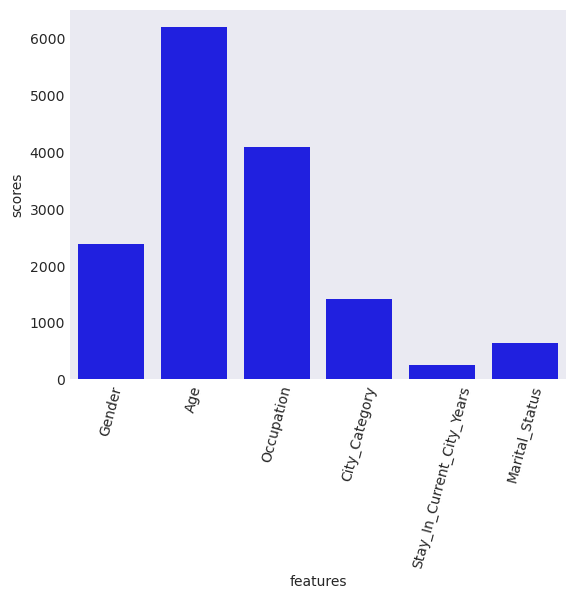

In [91]:
X = df[customer_features]
y = df['Combined_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
feature_selection(X_train, y_train, score_f=chi2, k='all')

Feature selection
Response: Combined_Category
Score function: mutual_info_classif
Total features: 6
Supported features, k: all

Feature                    Score
Gender                     0.015313745122734979
Age                        0.01495123570110124
Occupation                 0.013351229484785065
City_Category              0.0034927029359694828
Stay_In_Current_City_Years 0.00091405647473497
Marital_Status             0.0


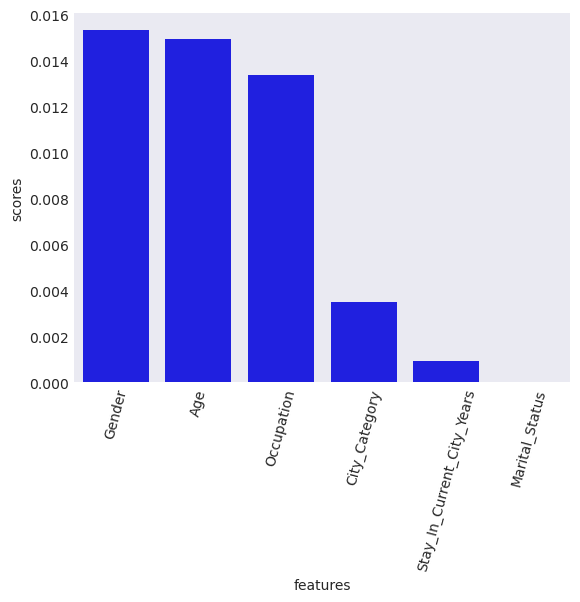

In [92]:
X = df[customer_features]
y = df['Combined_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
feature_selection(X_train, y_train, score_f=mutual_info_classif, k='all')

> Age, Gender and Occupation features suggested to be the most important across all tests owerall.

### Quick overview of Combined_Category

In [93]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Combined_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,3
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1_6_14
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,12
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,12_14
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,8


In [94]:
combined_cat_pivot = create_pivot(df, 'Combined_Category', agg_dict, print_=False)
combined_cat_pivot = combined_cat_pivot.droplevel(0, axis=1)
combined_cat_pivot

,,sum,mean,median,std,count
0,1,86235411,13069.931949,12097.0,4049.246234,6598
1,10,9254329,20294.581140,23069.5,3935.567635,456
2,10_11,19206,19206.000000,19206.0,NaN,1
3,10_13,17879325,20789.912791,23112.0,3468.584790,860
4,10_13_16,18988941,18616.608824,19011.0,4903.928429,1020
...,...,...,...,...,...,...
232,8_18,3846493,7571.836614,7925.0,1989.787490,508
233,8_9,1053797,6627.654088,6125.0,1997.586775,159
234,8_9_14,2002226,7730.602317,7916.0,1750.037904,259
235,9,18456,18456.000000,18456.0,NaN,1


In [95]:
combined_cat_pivot.columns.values[0] = 'Combined_Category'
combined_cat_pivot.sort_values(by='count')

,Combined_Category,sum,mean,median,std,count
2,10_11,19206,19206.000000,19206.0,NaN,1
235,9,18456,18456.000000,18456.0,NaN,1
157,5_10_16,7218,3609.000000,3609.0,2405.577270,2
98,2_12_14,156312,12024.000000,12941.0,3983.562601,13
153,4_9,29149,1943.266667,2074.0,653.379398,15
...,...,...,...,...,...,...
222,8_14,114820625,7194.274749,7848.0,2057.769508,15960
167,5_14,144212971,6231.116963,6900.0,1828.501756,23144
183,5_8,151774763,6536.099350,6971.0,1826.929238,23221
211,8,456607417,7514.934447,7908.0,1990.560841,60760


<AxesSubplot:xlabel='count'>

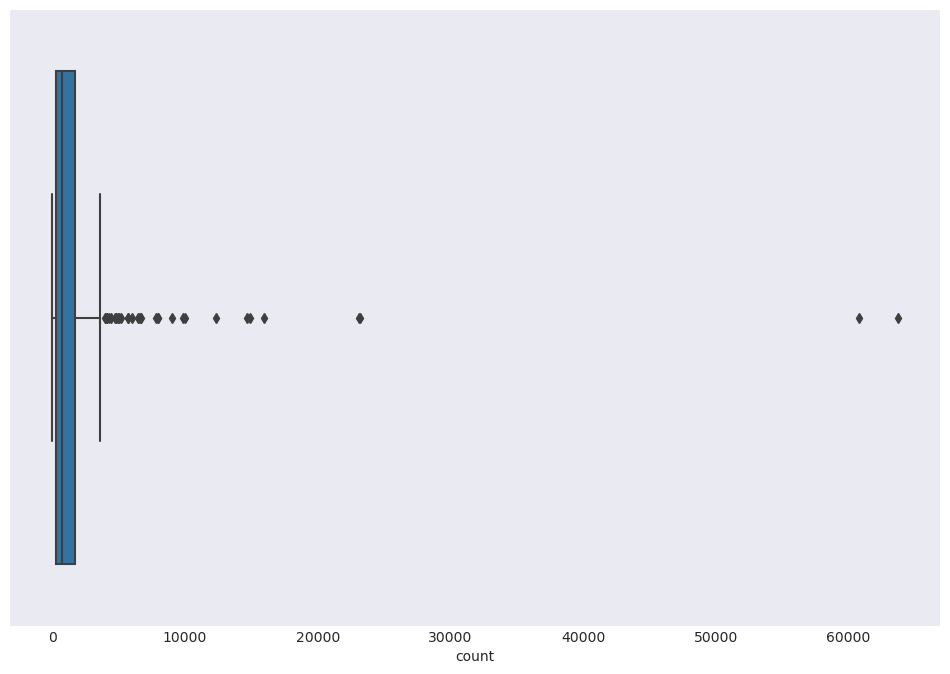

In [96]:
plt.figure(figsize=(12,8))
sns.boxplot(x=combined_cat_pivot['count'])

> There is huge difference in number of observations across Combined_Category

Unfortunately, without some tranformation (grouping etc.) based on product categories, classification can not be performed, as there is large amount of classes, some of which contains not enough members, and some contains a lot more than other.

## Final thoughts and further analysis

### Some conclusions

> Different groups of customers are represented unequally

> Mean value of purhcase across all customer features is roughly equivalent at the first glance

> Encoding product categories is generally a bad idea, as it makes it impossible to group or divide categories to manipulate number of class members during classification

> Marital_Status and Stay_In_Current_City_Years features have evidence for being redunant.



### Next steps

- Resemple the data,
    - Try to avoid any bias
    - Leave Product category unencoded
    - Consider not replacing customer Age with age group


- Perform regression analysis
    - Exclude (if needed) product category from the model
    - Try to redict Purchase based on customer features only

***And/or***

- Perform classification analysis
    - Decide how to group products based on categories for the best model score
    - Try to classify product category (likely to be purchased)  based on customer features